In [1]:
import tifffile as tf
from scipy import ndimage
from skimage import measure

import numpy as np
import pandas as pd

import os
import itertools as it
import glob
from importlib import reload

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

import walnut_utils as wnut

fs = 15
resol = 0.0759

struc1 = ndimage.generate_binary_structure(3, 1)
struc2 = ndimage.generate_binary_structure(3, 2)
struc3 = ndimage.generate_binary_structure(3, 3)
mborder = ndimage.generate_binary_structure(3, 3).astype(int)
mborder[mborder == 1] = -1
mborder[1,1,1] = -np.sum(mborder) - 1

src = '../hpcc/'
csrc = src + 'clean/'
rsrc = src + 'rotated/'
wsrc = src + 'watershed/'

dst = '../hpcc/topology/'

In [7]:
idname = '201SBa'

rownum = 5
treenum = 55
nutnum = 5

bname = idname + '_R{}_T{}'.format(rownum, treenum)
fname = bname + '_{:03d}'.format(nutnum)
print(fname)

img = tf.imread(csrc + bname + '/' + fname + '.tif')
img = np.pad(img, 8)

#img = ndimage.binary_erosion(img, struc1, 3, border_value=1)
img = ndimage.binary_dilation(img, struc1, 6, border_value=0)
#img = ndimage.binary_fill_holes(img, struc1)
img = ndimage.binary_erosion(img, struc1, 6, border_value=1)

bimg = img.copy().astype(int)
bimg[bimg > 0]  = 1
border = ndimage.convolve(bimg, mborder, mode='constant', cval=0)
border[border < 0] = 0
border[border > 0] = 1
border = border.astype(np.bool)

border = wnut.get_largest_element(border)
#border = ndimage.binary_dilation(border, struc2, 2, border_value=0)
#border = ndimage.binary_erosion(border, struc2, 2, border_value=1)
#bimg = bimg.astype(float).ravel()

#orig_datapoints = np.asarray(np.nonzero(border))
flat_datapoints = np.flatnonzero(border).astype(np.uint64)
#print(orig_datapoints.shape)
print(flat_datapoints.shape)

201SBa_R5_T55_005
1 components	 1 preserved
[833944]
(833944,)


In [8]:
mask = np.zeros(border.size, dtype=np.uint64)
mask[flat_datapoints] = flat_datapoints

edges, faces, cubes = wnut.complexify(flat_datapoints, mask, img.shape)

nv = len(flat_datapoints)
ne = len(edges)
nf = len(faces)
nc = len(cubes)

print('Verts:\t',nv)
print('Edges:\t',ne)
print('Faces:\t',nf)
print('Cubes:\t',nc)
print('\nEC:\t',nv-ne+nf-nc)

Verts:	 833944
Edges:	 1668892
Faces:	 835970
Cubes:	 1020

EC:	 2


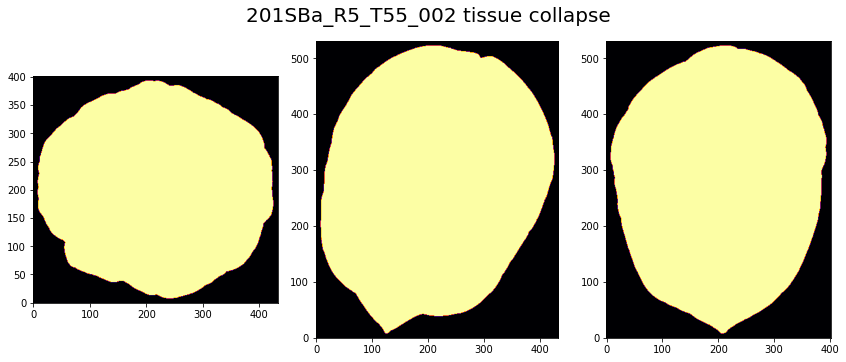

In [6]:
snaps = wnut.collapse_dimensions_max(border)
wnut.plot_collapse_dimensions(snaps, fname, display=True);
#snaps = wnut.collapse_dimensions(border)
#wnut.plot_collapse_dimensions(snaps, fname, display=True);

In [ ]:
coords = np.asarray(np.nonzero(~snaps[0]))
ccoords = coords - np.mean(coords, axis=1).reshape(-1,1)
foo = np.sqrt(np.sum(ccoords**2,axis=0))

In [ ]:
print(np.min(foo))
print(np.argmin(foo))
coords[:,np.argmin(foo)]

In [ ]:
a = np.zeros((5, 5), dtype=int)
a[1:4, 1:4] = 1
a[2,2] = 0
a[1,1] = 0
ndimage.binary_fill_holes(a, ndimage.generate_binary_structure(2,2)).astype(int)

# Kernel

In [34]:
reload (wnut)
idname = '2014SBa'

rownum = 1
treenum = 3
nutnum = 4

bname = idname + '_R{}_T{}'.format(rownum, treenum)
fname = bname + '_{:03d}'.format(nutnum)
print(fname)

img = tf.imread(wsrc + bname + '/' + fname + '_meat.tif')
img = np.pad(img, 10)

#img = ndimage.binary_erosion(img, struc1, 4, border_value=1)
img = ndimage.binary_dilation(img, struc1, 4, border_value=0)
#img = ndimage.binary_fill_holes(img)
img = ndimage.binary_erosion(img, struc1, 4, border_value=1)

bimg = img.copy().astype(int)
bimg[bimg > 0]  = 1
border = ndimage.convolve(bimg, mborder, mode='constant', cval=0)
border[border < 0] = 0
border[border > 0] = 1
border = border.astype(np.bool)

2014SBa_R1_T3_004


In [35]:
border = wnut.get_largest_element(border, minsize=1000)
#border = ndimage.binary_dilation(border, struc2, 2, border_value=0)
#border = ndimage.binary_erosion(border, struc2, 2, border_value=1)
flat_datapoints = np.flatnonzero(border).astype(np.uint64)
mask = np.zeros(border.size, dtype=np.uint64)
mask[flat_datapoints] = flat_datapoints

3 components	 2 preserved
[922111   1031      1]


In [36]:
edges, faces, cubes = wnut.complexify(flat_datapoints, mask, img.shape)

nv = len(flat_datapoints)
ne = len(edges)
nf = len(faces)
nc = len(cubes)

print('Verts:\t',nv)
print('Edges:\t',ne)
print('Faces:\t',nf)
print('Cubes:\t',nc)
print('\nEC:\t',nv-ne+nf-nc)

Verts:	 923142
Edges:	 1849499
Faces:	 930021
Cubes:	 3690

EC:	 -26


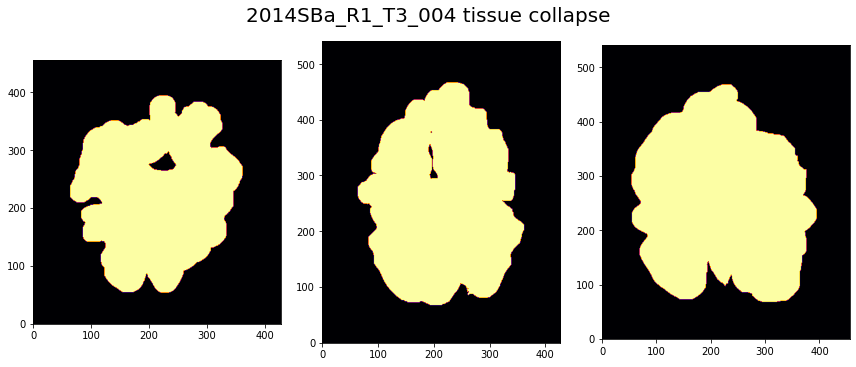

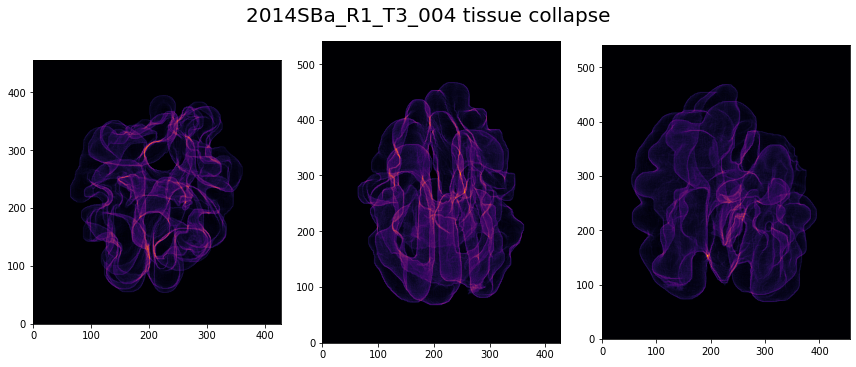

In [33]:
snaps = wnut.collapse_dimensions_max(border)
wnut.plot_collapse_dimensions(snaps, fname, display=True);
snaps = wnut.collapse_dimensions(border)
wnut.plot_collapse_dimensions(snaps, fname, display=True);

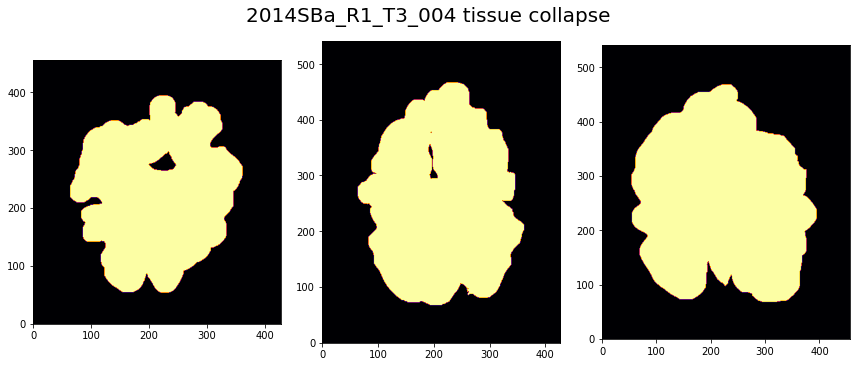

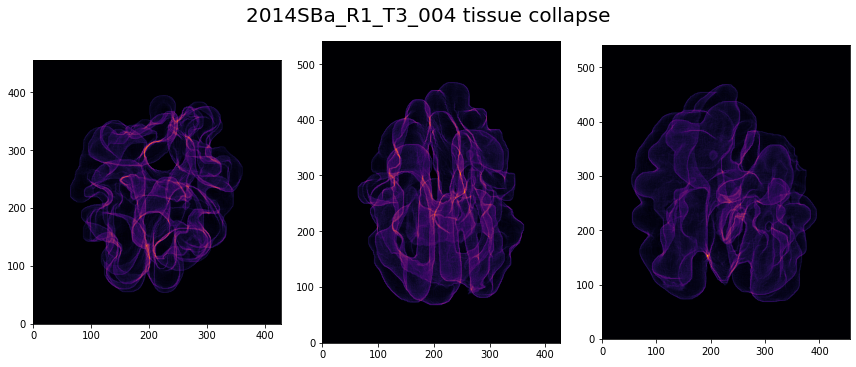

In [37]:
snaps = wnut.collapse_dimensions_max(border)
wnut.plot_collapse_dimensions(snaps, fname, display=True);
snaps = wnut.collapse_dimensions(border)
wnut.plot_collapse_dimensions(snaps, fname, display=True);